In [ ]:
# Credit Card Fraud Detection using Neural Networks
# IMPORTING REQUIRED MODULES
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)
import itertools
import warnings
warnings.filterwarnings("ignore")

1.16.2
0.24.2
0.9.0


In [ ]:
# NEURAL NETWORKS MODULES
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# KERAS MODULES
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import Callback
import keras.backend as kb
import tensorflow as tf
print(tf.__version__)

Using TensorFlow backend.


1.13.1


In [ ]:
dataset = pd.read_csv("creditcard.csv")
print("Few Entries: ")
print(dataset.head())
print("Dataset Shape: ", dataset.shape)
print("Maximum Transaction Value: ", np.max(dataset.Amount))
print("Minimum Transaction Value: ", np.min(dataset.Amount))

Few Entries: 
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       

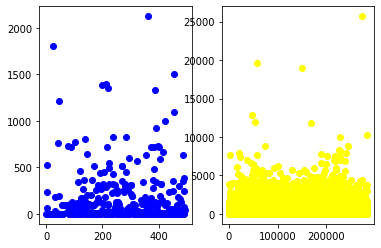

In [ ]:
# PLOTTING A FEW GRAPHS
color = {1:'blue',0:'yellow'}
fraudlist = dataset[dataset.Class == 1]
notfraudlist = dataset[dataset.Class == 0]
fig,axes = plt.subplots(1,2)
axes[0].scatter(list(range(1,fraudlist.shape[0]+1)),fraudlist.Amount,color='blue')
axes[1].scatter(list(range(1,notfraudlist.shape[0]+1)),notfraudlist.Amount,color='yellow')
plt.show()

In [ ]:
# SETTING UP THE TRAINING AND TESTING SETS
x = dataset.loc[:,dataset.columns.tolist()[1:30]]
x = x.as_matrix()
y = dataset.loc[:,'Class']
y = y.as_matrix()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)
print("Elements in the training set:" , np.bincount(y_train))
print("Elements in the testing set:" , np.bincount(y_test))
print(x_train)

Elements in the training set: [190490    330]
Elements in the testing set: [93825   162]
[[-5.44233648e-01 -4.48641366e-01  6.57484564e-01 ...  3.13498243e-01
   1.22707993e-01  8.40000000e+00]
 [ 1.09939674e+00 -2.01076452e-01  8.86128764e-01 ... -1.70798475e-02
   2.35100978e-02  5.88800000e+01]
 [ 1.06255788e+00  1.45901460e-01  1.53142873e+00 ...  3.46026446e-02
   2.63929912e-02  1.05600000e+01]
 ...
 [ 1.51260229e+00 -9.49435315e-01 -2.19061626e-01 ... -1.41537086e-03
   3.66494418e-03  3.49000000e+01]
 [ 1.79886333e+00 -1.69979073e+00 -1.42182189e-01 ... -3.36155803e-02
  -3.24705125e-02  1.71310000e+02]
 [-5.89399721e-01  7.47828393e-01  1.78478144e+00 ...  8.65917860e-02
   1.18083774e-01  1.59900000e+01]]


In [ ]:
# FUNCTION FOR TRAINING THE MODEL
def trainmodel(model):
    model.fit(x_train,y_train)

In [ ]:
# FUNCTION TO MAKE PREDICTIONS
def predictmodel(model):
    y_pred = model.predict(x_test)
    f,t,thresholds = metrics.roc_curve(y_test,y_pred)
    cm = metrics.confusion_matrix(y_test,y_pred)
    print("Score:", metrics.auc(f,t))
    print("Classification report:")
    print(metrics.classification_report(y_test,y_pred))
    print("Confusion Matrix:")
    print(cm)

In [ ]:
# FUNCTION TO MAKE PREDICTIONS
def predictmodeln(model):
    y_pred = model.predict_classes(x_test)
    f,t,thresholds = metrics.roc_curve(y_test,y_pred)
    cm = metrics.confusion_matrix(y_test,y_pred)
    print("Score:", metrics.auc(f,t))
    print("Classification report:")
    print(metrics.classification_report(y_test,y_pred))
    print("Confusion Matrix:")
    print(cm)

In [ ]:
# DEFINING THE NEURAL NETWORK
model = Sequential()
model.add(Dense(256,activation='sigmoid',input_dim=29))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
# CHECKING THE OUTPUT OF THE DEFINED NETWORK
model.fit(x_train,y_train,epochs=5)
print(predictmodeln(model))

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
190820/190820 [==============================] - 21s 108us/step - loss: 0.0071 - acc: 0.9991
Epoch 2/5
190820/190820 [==============================] - 17s 91us/step - loss: 0.0066 - acc: 0.9991
Epoch 3/5
190820/190820 [==============================] - 17s 91us/step - loss: 0.0067 - acc: 0.9992
Epoch 4/5
190820/190820 [==============================] - 17s 91us/step - loss: 0.0066 - acc: 0.9992 0s - loss: 0.0066 - acc: 0.999
Epoch 5/5
190820/190820 [==============================] - 18s 92us/step - loss: 0.0073 - acc: 0.9992
Score: 0.8949178435029754
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.83      0.79      0.81       162

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.91      0.89      0.90     93987
weighted avg       1.00      1.00      1.00     93987

Confusion Matrix:
[[93798    27]
 

In [ ]:
# REPLICATION OF THE SMALLEST CLASS
fraudlist = x_train[y_train==1]
y_fraudlist = y_train[y_train==1]
print(x_train.shape)

for _ in range(5):
    copy_fraudlist = np.copy(fraudlist)
    y_fraud_copy = np.copy(y_fraudlist)
    x_train = np.concatenate((x_train,copy_fraudlist))
    y_train = np.concatenate((y_train,y_fraud_copy))

permut = np.random.permutation(x_train.shape[0])
x_train = x_train[permut]
y_train = y_train[permut]
print(x_train)

(190820, 29)
[[ 1.97980895e+00 -5.80434537e-01 -1.72833391e+00 ...  5.54047155e-02
  -3.80039525e-02  2.50000000e+00]
 [-3.64218725e-01  3.17871152e-01  1.61636168e-01 ...  1.61175529e-01
  -2.90817174e-01  2.37600000e+02]
 [-5.07810080e-01  6.11614417e-01  1.72637548e+00 ...  2.06408742e-01
  -1.69135531e-01  2.50000000e+01]
 ...
 [-4.31594210e+00 -4.56494435e+00  1.73462803e+00 ...  3.18449786e-01
  -2.21781296e-01  5.92520000e+02]
 [-1.61737413e+00 -6.98211926e-02  1.47731631e+00 ... -7.28425055e-01
  -4.78120936e-01  3.54900000e+01]
 [-1.03900184e+01 -1.22283908e+01 -4.91723889e-01 ...  3.02749299e+00
  -1.25940116e+00  1.38000000e+02]]


In [ ]:
# REDEFINE THE NEURAL NETWORK
model = Sequential()
model.add(Dense(256,activation='sigmoid',input_dim=29))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# INCREASING ACCURACY BY MULTIPLE PASSES
model.fit(x_train,y_train,epochs=5)
print(predictmodeln(model))

model.fit(x_train,y_train,epochs=5)
print(predictmodeln(model))

Epoch 1/5
192470/192470 [==============================] - 20s 104us/step - loss: 0.0169 - acc: 0.9966
Epoch 2/5
192470/192470 [==============================] - 19s 96us/step - loss: 0.0118 - acc: 0.9976
Epoch 3/5
192470/192470 [==============================] - 19s 100us/step - loss: 0.0104 - acc: 0.9979
Epoch 4/5
192470/192470 [==============================] - 19s 97us/step - loss: 0.0096 - acc: 0.9980
Epoch 5/5
192470/192470 [==============================] - 19s 98us/step - loss: 0.0090 - acc: 0.9981
Score: 0.916474820143885
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.79      0.83      0.81       162

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.89      0.92      0.91     93987
weighted avg       1.00      1.00      1.00     93987

Confusion Matrix:
[[93789    36]
 [   27   135]]
None
Epoch 1/5
192470/192470 [==============================] - 

In [ ]:
# DECISION TREE CLASSIFIER
dtc = DecisionTreeClassifier()
trainmodel(dtc)
predictmodel(dtc)

Score: 0.8763620214939161
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.78      0.75      0.77       162

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.89      0.88      0.88     93987
weighted avg       1.00      1.00      1.00     93987

Confusion Matrix:
[[93791    34]
 [   40   122]]


In [ ]:
# NAIVE BAYES CLASSIFIER
gnb = GaussianNB()
trainmodel(gnb)
predictmodel(gnb)

Score: 0.9085993427480238
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     93825
           1       0.06      0.84      0.11       162

   micro avg       0.98      0.98      0.98     93987
   macro avg       0.53      0.91      0.55     93987
weighted avg       1.00      0.98      0.99     93987

Confusion Matrix:
[[91732  2093]
 [   26   136]]


In [ ]:
#ANN
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import average_precision_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("creditcard.csv")

In [ ]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [ ]:
data.drop("Time", axis=1, inplace=True)

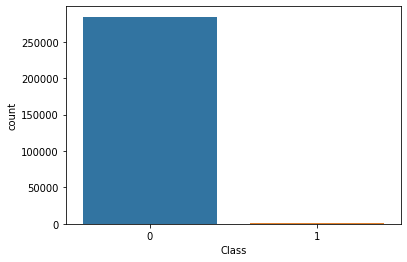

In [ ]:
sns.countplot(data["Class"])

In [ ]:
data.isnull().any().describe()

count        30
unique        1
top       False
freq         30
dtype: object

In [ ]:
limit = int(0.9*len(data))
train = data.loc[:limit]
val_test = data.loc[limit:]
val_test.reset_index(drop=True, inplace=True)
val_test_limit = int(0.5*len(val_test))
val = val_test.loc[:val_test_limit]
test = val_test.loc[val_test_limit:]

In [ ]:
print("Number of fraudulent transactions in the validation set: {}"\
      .format(val["Class"].value_counts()[1]))
print("Number of fraudulent transactions in the test set: {}"\
      .format(test["Class"].value_counts()[1]))

Number of fraudulent transactions in the validation set: 11
Number of fraudulent transactions in the test set: 11


In [ ]:
train_positive = train[train["Class"] == 1]
train_positive = pd.concat([train_positive] * int(len(train) / len(train_positive)), ignore_index=True)
noise = np.random.uniform(0.9, 1.1, train_positive.shape)
train_positive = train_positive.multiply(noise)
train_positive["Class"] = 1
train_extended = train.append(train_positive, ignore_index=True)
train_shuffled = train_extended.sample(frac=1, random_state=0).reset_index(drop=True)

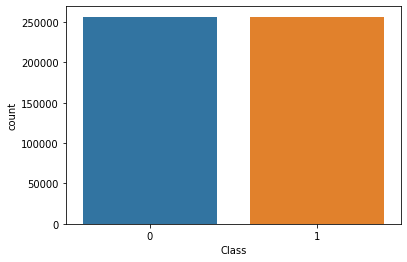

In [ ]:
sns.countplot(train_shuffled["Class"])

In [ ]:
X_train = train_shuffled.drop(labels=["Class"], axis=1)
Y_train = train_shuffled["Class"]
X_val = val.drop(labels=["Class"], axis=1)
Y_val = val["Class"]
X_test = test.drop(labels=["Class"], axis=1)
Y_test = test["Class"]

In [ ]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_val[X_val.columns] = scaler.transform(X_val)
X_test[X_test.columns] = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=(X_train.shape[1])))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=Adam(lr=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(X_train, 
                    Y_train, 
                    epochs=5, 
                    validation_data=(X_val, Y_val), 
                    callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                1920      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 3         
Total para

KeyError: 'Accuracy'

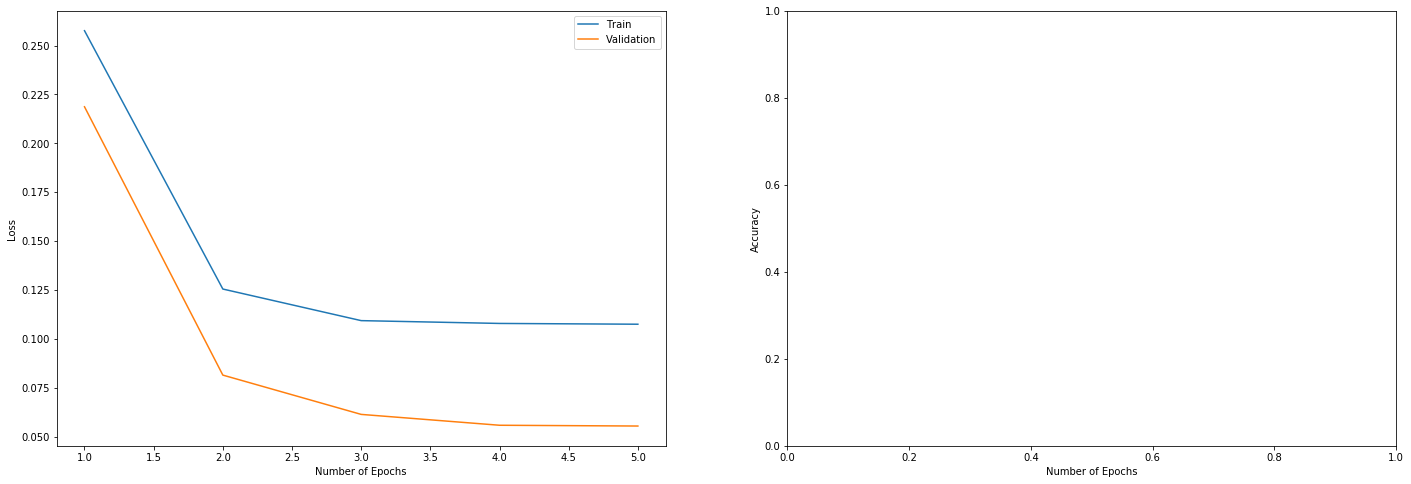

In [ ]:
num_epochs = len(history.history["loss"])
fig, axarr = plt.subplots(1, 2, figsize=(24, 8))
axarr[0].set_xlabel("Number of Epochs")
axarr[0].set_ylabel("Loss")
sns.lineplot(x=range(1, num_epochs+1), y=history.history["loss"], label="Train", ax=axarr[0])
sns.lineplot(x=range(1, num_epochs+1), y=history.history["val_loss"], label="Validation", ax=axarr[0])
axarr[1].set_xlabel("Number of Epochs")
axarr[1].set_ylabel("Accuracy")
axarr[1].set_ylim(0, 1)
sns.lineplot(x=range(1, num_epochs+1), y=history.history["accuracy"], label="Train", ax=axarr[1])
sns.lineplot(x=range(1, num_epochs+1), y=history.history["val_acc"], label="Validation", ax=axarr[1])

In [ ]:
test_results = model.evaluate(X_test, Y_test)
print("The model test accuracy is {}.".format(test_results[1]))

14241/14241 [==============================] - 0s 29us/step
The model test accuracy is 0.998806263605084.


In [ ]:
predictions = model.predict_classes(X_test)
ap_score = average_precision_score(Y_test, predictions)
print("The model test average precision score is {}.".format(ap_score))

The model test average precision score is 0.182169280757863.


(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

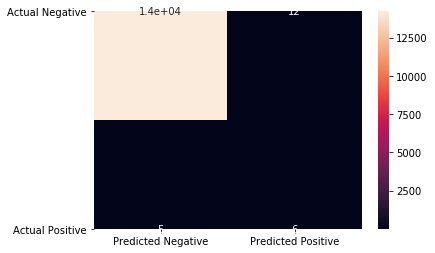

In [ ]:
confusion = pd.DataFrame(confusion_matrix(Y_test, predictions))
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
sns.heatmap(confusion, annot=True)
plt.yticks(rotation=0)